[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ciri/iese-dsfb/blob/main/notebooks/410-Airline-Text-Analytics-Part-II.ipynb)

# Airline Text Analytics Part II

As part of an effort to better understand passenger satisfaction within the Star Alliance network, we analyze customer reviews from thousands of airline passengers both in and outside of network. The goal is to identify how factors like sentiment, seat type, travel purpose, and specific routes relate to overall recommendation rates.

The dataset includes 23,000+ reviews, with key variables such as:

- `Airline Name`: the name of the airline.
- `Route`: the flight route taken by the passenger.
- `Review`: free-text review written by the traveler.
- `Type Of Traveller`: e.g., Solo Leisure, Business, Couple.
- `Recommended`: whether the traveler recommends the airline (yes/no).
- `Seat Type`: seat class (e.g., Economy, Business).

Data Source: [Airlinequality.com](https://www.airlinequality.com/) via [Kaggle](https://www.kaggle.com/datasets/khushipitroda/airline-reviews/data)

### Importing the data

We've already partially cleaned the data and explored it. Let's now look into a couple more advanced text-analytics.

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', None) # This allow me to see the whole passage of a text review.

## Better: store it locally first, then open it
df = pd.read_csv('../resources/text/Airline_Reviews.csv')[['Airline Name','Route','Review','Type Of Traveller','Recommended','Seat Type']]
## Download every time, works but is slower:
# df = pd.read_csv('https://raw.githubusercontent.com/ciri/iese-dsfb/refs/heads/main/resources/text/Airline_Reviews.csv')[['Airline Name','Route','Review','Type Of Traveller','Recommended','Seat Type']]

df.head()

,Airline Name,Route,Review,Type Of Traveller,Recommended,Seat Type
0,AB Aviation,Moroni to Moheli,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",Solo Leisure,yes,Economy Class
1,AB Aviation,Moroni to Anjouan,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",Solo Leisure,no,Economy Class
2,AB Aviation,Anjouan to Dzaoudzi,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",Solo Leisure,no,Economy Class
3,Adria Airways,Frankfurt to Pristina,"Please do a favor yourself and do not fly with Adria. On the route from Munich to Pristina in July 2019 they lost my luggage and for 10 days in a row, despite numerous phone calls they were not able to locate it. 11 days later the luggage arrived at the destination completely ruined. Applying for compensation, they ignored my request. Foolishly again, I booked another flight with them (345 euros) Frankfurt - Pristina in September 2019. They cancelled the flight with no reason 24 hours before the departure. Desperate phone calls to customer service to get anything (rerouting, compensation, etc) were not responded. I will never fly again with Adria. What a disgrace! Shame on you Adria for constantly deceiving your customers.",Solo Leisure,no,Economy Class
4,Adria Airways,Sofia to Amsterdam via Ljubljana,"Do not book a flight with this airline! My friend and I should have returned from Sofia to Amsterdam on September 22 and 3 days before, they sent us an SMS informing the flight was cancelled. For 3 straight days we tried to reach the airline and the web agent (e-dreams) and we did not get a solution. Finally, 18 hours before our cancelled flight time, and after 35 minutes on a call (waiting), the airline was able to get us on a flight with Lufthansa. Do not book Adria Airways, it is unreliable and in our case, it ruined our last days of holidays since we needed to be on the phones all day.",Couple Leisure,no,Economy Class


## Sentiment analysis

Sentiment analysis is a natural language processing (NLP) technique used to identify and quantify emotions in text. It is a staple of marketing analytics, as it helps companies understand how customers feel about their brand, products, or services by analyzing reviews, social media, and survey responses. 

Let us try to see if we can discover any postive or negative trends in the flight experience.

### Approach 1: ad-hoc

In [2]:
good = df.Review.str.lower().str.contains('good')
bad  = df.Review.str.lower().str.contains('bad')

print(good.mean(), bad.mean())

0.21608956001041396 0.09767421678382365


**You try it**

Implement the sentiment scoring function, the sentiment of a review $i$ is defined as:
$$
    S_i = G_i - B_i
$$
Where $G$ is a dummy value for good (1 if good is in the message), and $B$ is a dummy value for bad (1 if bad is in the message).

Plot the distribution of sentiment of the whole dataset (a histogram).

Let's now learn an alternative way to write this as it will be useful later. When we do more complex operations on a row-basis, we can use the `apply(f)` command which applies the given function `f` to all rows.

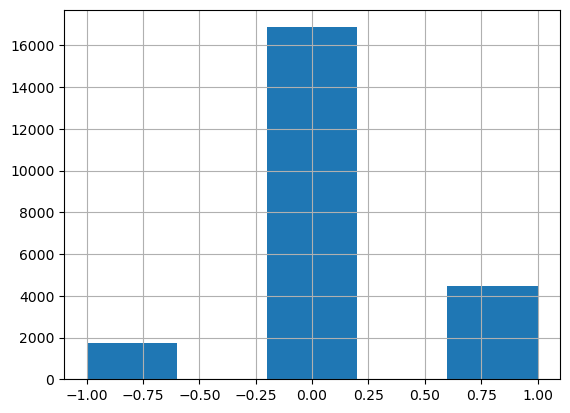

In [3]:
def sentiment(review):
    is_good = 'good' in review.lower()
    is_bad  = 'bad'  in review.lower()
    return is_good - is_bad

df['simple_sentiment'] = df.Review.apply(sentiment)
df.simple_sentiment.hist(bins=5);

**Litmus test**

This all feels a bit ad-hoc and we should probably validate this with the recommendations to make sure the sentiment makes sense ...

In [4]:
df[good].sample(3)

,Airline Name,Route,Review,Type Of Traveller,Recommended,Seat Type,simple_sentiment
16647,Rex Airlines,Melbourne to Adelaide,"Rex staff at Melbourne Airport were appalling when i visited them to check in the day before my flight. The lady who attended to me first in Melbourne was utterly unhelpful. Her colleague seemed to realise that I was being mis-advised and so the other Rex person stepped in and completed what was required to be done. On the day of my flight I needed help re carrying my bigger bag - next time I will make sure I have a bag with wheels. But the Rex personnel said that they could not help me with that until I had been through the check in area (yet Adelaide staff in Rex did help when I was in Adelaide earlier) I use an aid to walk and I am elderly and I was flying solo. Rex staff at airport were negative when I asked if a trolley or something after I had gone through checkin to help me to carry the bag. I asked if that was possible and I got no where. I did not know where to go to wait for the plane and was told I should go back where i came from to the Rex staff. So different to the Rex staff in Adelaide. After letting a man in the area where one goes through the xray that I did not know how far the walk was nor where to go he was completely disinterested. If I started walking and chose the wrong way I was worried I might miss the plane. He, utterly disinterested, told me ""if you miss your plane you can try to get a refund"" i felt worried and distressed, Eventually another person did help me and it was a long walk - much longer than I anticipated , to the correct area. I thanked that person who was not a Rex employee. I had told the Rex staff the day before that I thought I would need some assistance re getting to the plane. Yet was that request not documented? Because on the flight day they blamed me for not having asked earlier for assistance. I clearly did say the day before that I would require assistance. The Rex staff at Melbourne were not kind, not interested, not understanding and not reassuring. Only at the final moment just before boarding and just before she finished her shift for the day did a very nice Rex lady come over to me and she advised that she had arranged some help for me. that was good. BUut when I arrived in Adelaide no one on the plane had arranged for me to get help with getting my heavier bag out to the taxi as no one had been asked to arrange that. Fortunately another person - one of the air hostesses on the plane stepped in and suggested I wait until the other passengers had left the plane and then she would get me a person to help. I appreciated her understanding. I cannot understand why, for the same airline, that staff in one city can be pleasant and helpful while their colleagues in another city could not care less",Solo Leisure,no,Economy Class,1
20892,TUIfly,Amsterdam to Curacao,"First time on TUI flight. Booked Deluxe Class (Premium Economy) to Curacao. Boarding was good as well as the onboard experience. Two major air carrier from AMS-CUR are KLM and TUI. Despite TUI fly their B787, however Deluxe class non-flatbed seats are unbeatable against KLM flatbed. Wonder if TUI ever want to change their seat configuration to compete their competitor at least on their long-haul flight. Delayed for almost 1 hour and it seemed they were expecting for their stand-by cabin crews to arrived. Catering onboard was great however. Wine and champagne are still available.",Couple Leisure,yes,Premium Economy,1
3253,AirAsia India,Mumbai to Bengaluru,"I had booked this flight a long time back in February so the fares were much cheaper. The web check-in process was smooth and it is observed that if one selects the default seats, they are free of cost however if one selects any other seat then a small fee needs to be paid. The bag drop was in terminal 1 of Mumbai airport which was done in a jiffy. Boarding started well ahead of time and the leather seats were good however for a taller person t

In [5]:
df["Recommended01"] = (df.Recommended == 'yes').astype(int)
df[['simple_sentiment','Recommended01']].corr()

,simple_sentiment,Recommended01
simple_sentiment,1.000000,0.319901
Recommended01,0.319901,1.000000


### Approach 2: lexicon-based

The VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon was developed by C.J. Hutto and Eric Gilbert in 2014 at Georgia Tech. They first collected sentiment ratings from human annotators for thousands of words and phrases, then used statistical methods to fine-tune these scores. The final dictionary captures not only the polarity (positive/negative) of words but also their intensity, making it especially effective for short, informal text like tweets or product reviews.

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon');
sia = SentimentIntensityAnalyzer();

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/enric/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Let us start by inspecting the lexicon.

In [7]:
sia.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

You can look up the individual valences of a word using the set get method:

In [8]:
sia.lexicon.get("amazing")

2.8

To apply it to paragraph of text, use the `polarity_scores` method. It returns a set of scores where neg is the negative valence, pos the positive valence and neu the neutral valence. Compound is a smart combination of valences of all the words in the sentence:
$$
\text{compound} = \frac{\sum_{i=1}^{n} s_i}{\sqrt{\left(\sum_{i=1}^{n} s_i\right)^2 + 15}}
$$
Which yields a value between -1 (negative) and +1 (positive).

In [9]:
sia.polarity_scores('I really loved the snacks on the flight!')

{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.6689}

This is not a pandas function, so to apply it to all elements of a column we must (a) define a function, (b) use the `apply` method to apply it to all elements of the column.

In [10]:
# If you are on an old computer, you may need to use the sample instead as this could take a minute or two.
def get_sentiment(review):
    return sia.polarity_scores(review)['compound']

# This is the usual command to apply a function to a column.
# df['sentiment'] = df['Review'].apply(get_sentiment)

To get a progress bar while you do this, import the `tqdm` package and use `.progress_apply` instead.

In [11]:
from tqdm import tqdm
tqdm.pandas()

df['sentiment'] = df['Review'].progress_apply(get_sentiment)

100%|██████████| 23046/23046 [00:12<00:00, 1806.15it/s]


**You try it**

Show the top 2 most positive and negative reviews.

**Litmus test**

Apply the correlation test, what do you find?

Not too bad, still, the above method is very crude and can't handle things like negation. We can go beyond that by using machine learning, especially models trained on large datasets of human-labeled text.

### Approach 3: Machine Learning

A popular family of machine learning approaches to sentiment analysis is BERT (Bidirectional Encoder Representations from Transformers). Once you know how to use them, they become the swiss army knife of text analytics. BERT models have been fine-tuned for tasks like:
* Sentiment analysis
* Text classification
* Topic detection
* ...

For now, let's keep it simple with a lightweight version of BERT, already fine-tuned for sentiment:
`distilbert-base-uncased-finetuned-sst-2-english`. It's fast, free to use, and good enough to show the power of transformer models over rule-based methods.

Note: this may not run on all computers, if it doesn't on yours, switch to google collab.

In [12]:
#! pip install transformers torch
from transformers import pipeline

# Lightweight BERT-based sentiment analyzer
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english",truncation  = True,  max_length  = 512)

def scored_sentiment(text):
    result = sentiment_model(text)[0]
    return result['score'] if result['label'] == 'POSITIVE' else -result['score']

scored_sentiment('Best. Flight. Ever.')

/home/enric/miniconda3/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/enric/miniconda3/envs/llm/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


0.9998503923416138

**You try it**

Use the `.progress_apply` function to apply sentiment scoring to all BERT sentiments.

In [13]:
sample = df.sample(1000, random_state=42)

If you're feeling adventurous on a more powerful machine, you could try [this one](https://huggingface.co/cirimus/modernbert-base-go-emotions), created by your professor. It's trained to recognize a wide range of emotions in modern language.


In [ ]:
from transformers import pipeline
import torch

# Load the model
classifier = pipeline(
    "text-classification", 
    model="cirimus/modernbert-base-go-emotions",
    return_all_scores=True
)

text = "I am so happy and excited about this opportunity!"
predictions = classifier(text)

# Print top 5 detected emotions
sorted_preds = sorted(predictions[0], key=lambda x: x['score'], reverse=True)
top_5 = sorted_preds[:5]

print("\nTop 5 emotions detected:")
for pred in top_5:
    print(f"\t{pred['label']:10s} : {pred['score']:.3f}")

## Example output:
# Top 5 emotions detected:
#        excitement : 0.937
#        joy        : 0.915
#        desire     : 0.022
#        love       : 0.020
#        admiration : 0.017


### Who are the Stars in Star Alliance?

Now that we have the sentiment, let us try to rank airlines by sentiment. Use either the lexicon based sentiment or BERT depending on what worked for you.

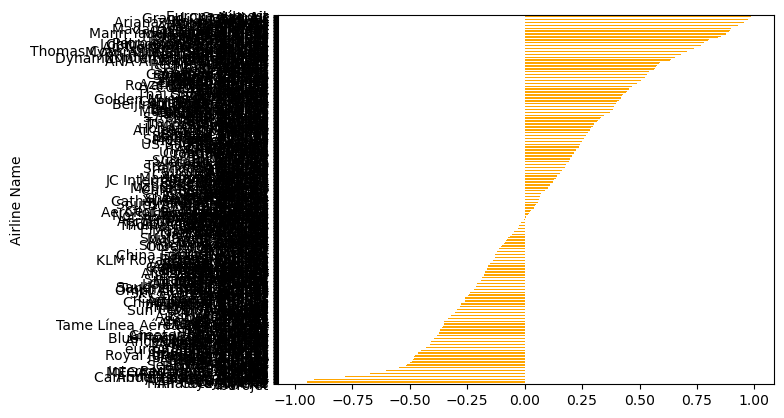

In [14]:
df.groupby('Airline Name')['sentiment'].mean().sort_values(ascending=True).plot.barh(color='orange');

For the sake of our analysis, let us drop any airline company with less than 10 reviews. Instead, we may just analyze star alliance airline companies:

In [15]:
# I asked ChatGPT to write this code for me
star_alliance_members = [
    'Aegean Airlines',
    'Air Canada',
    'Air China',
    'Air India',
    'ANA All Nippon Airways',
    'Asiana Airlines',
    'Austrian Airlines',
    'Avianca',
    'Brussels Airlines',
    'Copa Airlines',
    'Croatia Airlines',
    'Egyptair',
    'Ethiopian Airlines',
    'Eva Air',
    'LOT Polish Airlines',
    'Lufthansa',
    'Scandinavian Airlines',
    'Shenzhen Airlines',
    'Singapore Airlines',
    'South African Airways',
    'Swiss International Air Lines',
    'TAP Portugal',
    'Thai Airways',
    'Turkish Airlines',
    'United Airlines'
]

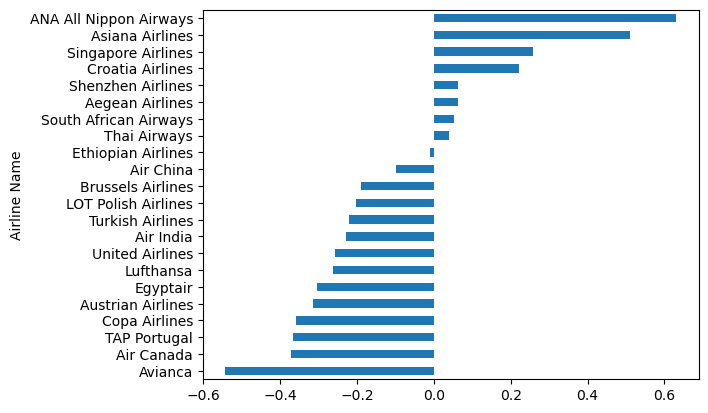

In [16]:
f_star_alliance = df['Airline Name'].isin(star_alliance_members)
df_star = df[f_star_alliance].copy()

star_sentiments = df_star.groupby('Airline Name')[['sentiment']].mean()
star_sentiments['sentiment'].sort_values().plot.barh();

What follow-up analysis would you do if you were working at star alliance?

## Beyond Sentiment

There are vast repositories of different machine learning models that can handle NLP tasks. For a quick look, check out the [HuggingFace NLP repository](https://huggingface.co/models). Still, sometimes you may want to do something "custom" to your situation. In this case, you have two choices:

1. Fine-tune your own BERT model (take the ML class)
2. Use LLM data annotation

Let's try to do the latter. For this you will first need to follow the following steps:

1. Create a [Google account](https://accounts.google.com/), or login to your existing one.
2. Create a [Gemini API key](https://aistudio.google.com/app/apikey) (this is free, but [usage limitations](https://cloud.google.com/gemini/docs/quotas#daily) apply).
3. Open a python environment to follow along.

In [ ]:
API_KEY = '...'

This allows you to talk to google's models directly from python:

In [19]:
# ! pip install -q -U google-genai
from google import genai

client = genai.Client(api_key=API_KEY)

response = client.models.generate_content(
    model="gemini-2.0-flash", contents="Explain in one number what the meaning of life is."
)
print(response.text)

42



LLM data annotation

In [20]:
df_ana = df[df['Airline Name'] == 'ANA All Nippon Airways']
df_ana[['Airline Name','Review']].head()

,Airline Name,Review
4350,ANA All Nippon Airways,"Pretty disappointed with ANA, especially when compared to JAL. Seats are dated and half are very exposed. The Japanese food was generally good and at times excellent. The champagne was undrinkable. The pre-flight drinks (where offered) were from plastic disposable cups. The main listed wine selection on every leg was unavailable. The crew were generally good and attentive. It is such a pity that they appear to be economising."
4351,ANA All Nippon Airways,"Great service, lovely crew, comfortable seats, lots of leg room ( I am 6'2""), roomy toilets and an immaculately clean aircraft. It’s hard to imagine how a 14 hour flight in economy could be done any better. I paid in advance an extra £15 for a special Japanese meal which was most definitely worth it and really delicious, beautifully presented."
4352,ANA All Nippon Airways,"Overall was a good experience, check in went smoothly, food was decent for airline food and the staff was friendly. The main downside was that the lounge in Tokyo Haneda was overcrowded."
4353,ANA All Nippon Airways,Paid for seats so entire family is together. Airline changes aircraft/seats and puts a stranger between us. Not even a single thought goes in this process. Extremely difficult to connect with someone on the phone. Unfortunately the competition is worse. Over the years flying changed from a fun way to travel to a dreadful experience.
4354,ANA All Nippon Airways,"I’m super unhappy about ANA service. They asked me and my daughter to move our luggage after we have settled down, me and my daughter are both short, but she didn’t offer her help, so that I almost dropped my luggage on one of passengers. Later during the breakfast time, she didn’t offer food to my daughter until I figured it out. My daughter is shy girl, so I had to step out and ask her to bring the breakfast to her. This kind of things have never happened to me before. I’m extremely unhappy about ANA service."


Start by going to your favorite LLM, and trying to annotate your data.

In [21]:
PROMPT = """
You're a world-class customer service analyst who is analyzing airline reviews.
Score the crew on the flight (friendliness, professionalism, helpfulness) from 0 to 10.
If crew is not mentioned, return 'N/A'.

Also extract the most relevant passage that supports your score.

Format your response as:

<score>YOUR_SCORE_HERE</score><passage>YOUR_PASSAGE_HERE</passage>

Important: only reply with the required tags and scores. Don't add anything else, you MUST use both tags.
"""
def score_crew(review_text):
    prompt = PROMPT + "\nReview:" + review_text
    response = client.models.generate_content(
        model="gemini-2.0-flash",
        contents=prompt
    )
    return response.text.strip()

score_crew('the crew was amazing. the food was good too.')

'<score>10</score><passage>the crew was amazing.</passage>'

**You try it**

1. Apply the scoring on a df_sample below.
2. Create a CrewScore column and Rationale column.

Hint: look at the llm_scores and find out what the best string splits are.

Hint2: this sometimes doesn't work as LLMs can make mistakes/hallucinate, so make sure to filter out any rows that do not contain the required tags (e.g. `<score>`)

In [112]:
df_sample = df.sample(50, random_state=42)